In [ ]:
!pip install keras==2.12.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/diabetes_data.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(70692, 18)

In [ ]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [ ]:
df.Diabetes.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [ ]:
df.Age.unique()

array([ 4., 12., 13., 11.,  8.,  1.,  6.,  3.,  7., 10.,  9.,  5.,  2.])

In [ ]:
df.isna()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70690,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna()
df.shape

(70692, 18)

In [ ]:
df = df.drop(['HeartDiseaseorAttack', 'Stroke'], axis=1)
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000


<Axes: >

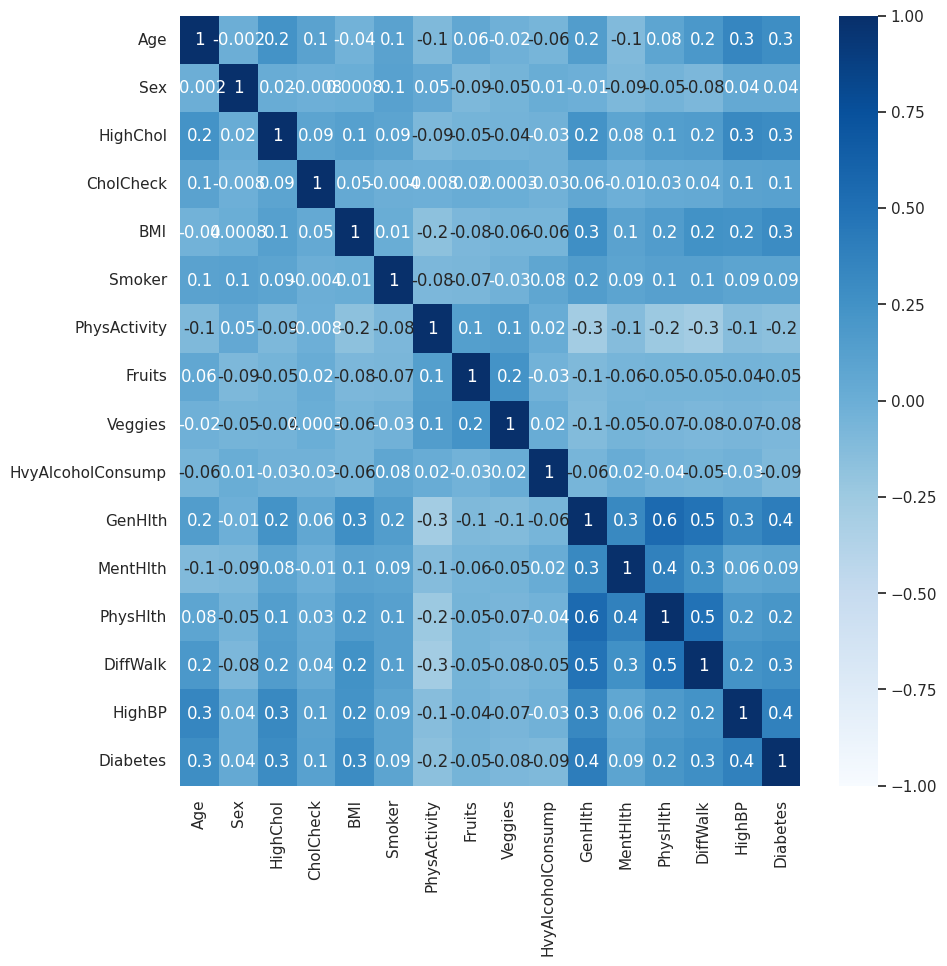

In [ ]:
import seaborn as sns
#f.corr().style.background_gradient(cmap="Blues")
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'Blues')

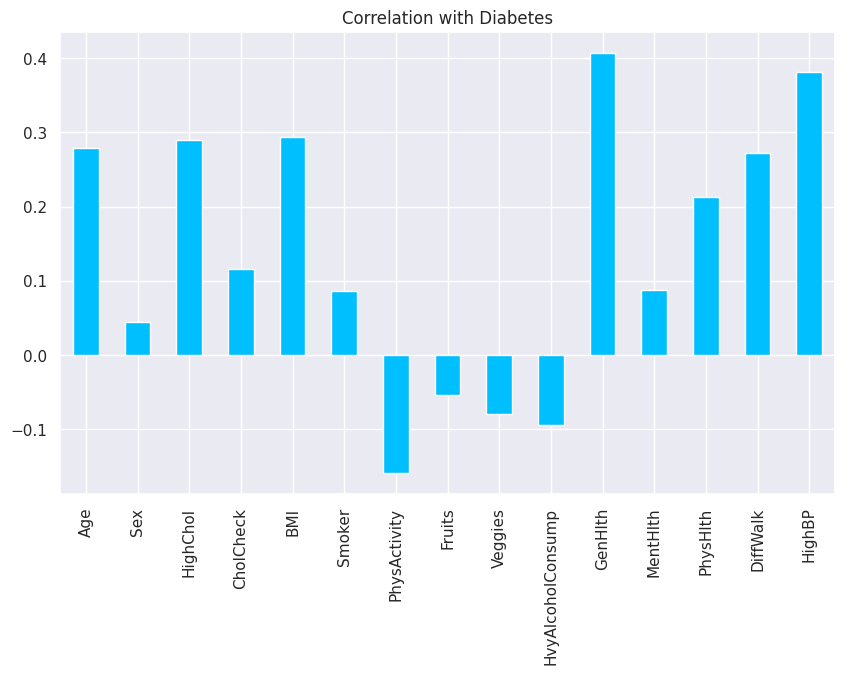

In [ ]:
#check correlation of other columns with diabetes column
corr_df = df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue");

In [ ]:
df_min = df.drop(['Sex', 'Fruits', 'Veggies'], axis=1)
df_min.head()

,Age,HighChol,CholCheck,BMI,Smoker,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,0.0,1.0,26.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
2,13.0,0.0,1.0,26.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0
4,8.0,0.0,1.0,29.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.min()

Age                   1.0
Sex                   0.0
HighChol              0.0
CholCheck             0.0
BMI                  12.0
Smoker                0.0
PhysActivity          0.0
Fruits                0.0
Veggies               0.0
HvyAlcoholConsump     0.0
GenHlth               1.0
MentHlth              0.0
PhysHlth              0.0
DiffWalk              0.0
HighBP                0.0
Diabetes              0.0
dtype: float64

In [ ]:
df.max()

Age                  13.0
Sex                   1.0
HighChol              1.0
CholCheck             1.0
BMI                  98.0
Smoker                1.0
PhysActivity          1.0
Fruits                1.0
Veggies               1.0
HvyAlcoholConsump     1.0
GenHlth               5.0
MentHlth             30.0
PhysHlth             30.0
DiffWalk              1.0
HighBP                1.0
Diabetes              1.0
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Diabetes'], axis=1)
y = df.Diabetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Sa umanjenim brojem kolona
X_min = df_min.drop(['Diabetes'], axis=1)
y_min = df_min.Diabetes
X_tr, X_t, y_tr, y_t = train_test_split(X_min, y_min, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP
14533,13.0,0.0,1.0,1.0,18.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0
57060,10.0,0.0,1.0,1.0,34.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
26147,10.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,3.0,11.0,5.0,1.0,1.0
24376,4.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
49271,7.0,0.0,0.0,1.0,37.0,1.0,0.0,1.0,0.0,0.0,2.0,20.0,5.0,0.0,1.0


In [ ]:
y_test.head()

44967    1.0
20220    0.0
23944    0.0
2707     0.0
42356    1.0
Name: Diabetes, dtype: float64

In [ ]:
columns = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

for column_name in columns:
    X_train[column_name] = (X_train[column_name] - X_train[column_name].mean()) / X_train[column_name].std()
    X_test[column_name] = (X_test[column_name] - X_test[column_name].mean()) / X_test[column_name].std()
# Normalizaija testa sa manjim brojem kolona
for column_name in columns:
    X_tr[column_name] = (X_tr[column_name] - X_tr[column_name].mean()) / X_tr[column_name].std()
    X_t[column_name] = (X_t[column_name] - X_t[column_name].mean()) / X_t[column_name].std()

In [ ]:
X_t.head()

,Age,HighChol,CholCheck,BMI,Smoker,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP
44967,0.495072,1.0,1.0,-0.959212,1.0,1.0,0.0,1.031691,-0.461705,-0.585002,0.0,0.0
20220,1.548250,0.0,1.0,0.449571,1.0,0.0,0.0,0.134929,-0.461705,-0.289125,1.0,0.0
23944,-0.207047,1.0,1.0,-0.395699,1.0,1.0,0.0,-0.761834,-0.461705,-0.091873,0.0,1.0
2707,-0.558106,1.0,1.0,-0.113942,1.0,0.0,0.0,0.134929,-0.461705,-0.091873,0.0,0.0
42356,-0.909166,0.0,1.0,2.421868,0.0,1.0,0.0,1.031691,3.193512,0.401255,1.0,1.0


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)
y_pred_train = kn.predict(X_train)

print("Accuracy validation:", accuracy_score(y_pred, y_test))
print("Accuracy train:" , accuracy_score(y_train, y_pred_train))

Accuracy validation: 0.7231233496793663
Accuracy train: 0.7848799611995797


In [ ]:
# KNN sa umanjenim brojem kolona
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(X_tr, y_tr)

y_pred = kn.predict(X_t)
y_pred_train = kn.predict(X_tr)

print("Accuracy validation:" , accuracy_score(y_pred, y_t))
print("Accuracy train:" , accuracy_score(y_pred_train, y_tr))

Accuracy validation: 0.7230290456431535
Accuracy train: 0.7797469889257134


In [ ]:
# Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("Accuracy validation:", accuracy_score(y_pred, y_test))
print("Accuracy train:" , accuracy_score(y_train, y_pred_train))

Accuracy validation: 0.7239720860052811
Accuracy train: 0.9673833966534637


In [ ]:
# SVM Classifier
from sklearn import svm

svmc = svm.SVC(kernel='linear')
svmc.fit(X_train, y_train)

y_pred = svmc.predict(X_test)
y_pred_train = svmc.predict(X_train)

print("Accuracy validation:", accuracy_score(y_pred, y_test))
print("Accuracy train:" , accuracy_score(y_train, y_pred_train))

Accuracy validation: 0.7478781591852132
Accuracy train: 0.7469485086088432


In [ ]:
# XGBoost Classifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy validation:", accuracy)

y_pred = xgb_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred )
print("Accuracy train:", train_accuracy)

Accuracy validation: 0.7102980007544323
Accuracy train: 0.7810403362703096


In [ ]:
import tensorflow as tf
import sklearn
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data = (X_test, y_test),
                    shuffle=True,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,985
Trainable params: 25,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
387/387 [==============================] - 1s 3ms/step - loss: 0.6771 - accuracy: 0.5341 - val_loss: 0.6575 - val_accuracy: 0.6333
Epoch 2/20
387/387 [======================